In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import keras
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix


from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from PIL import ImageFile

In [3]:
data_train = 'C:/Users/Admin/Downloads/news/train'
data_test = 'C:/Users/Admin/Downloads/news/test'

In [4]:
batch_size = 10
epochs = 5
img_height = 224
img_width = 224

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=data_train,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 928 images belonging to 4 classes.


In [6]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=data_test,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 448 images belonging to 4 classes.


In [7]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

In [8]:
base_model=MobileNet( weights='imagenet',include_top=False,input_shape=(224,224,3))

In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D


In [10]:
xception_net = tf.keras.models.Sequential()

xception_net.add(base_model)
xception_net.add(GlobalAveragePooling2D())
xception_net.add(Dense(4, activation = 'softmax'))
xception_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 3,232,964
Trainable params: 3,211,076
Non-trainable params: 21,888
_________________________________________________________________


In [11]:
xception_net.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = xception_net.fit(train_data_gen, epochs=9,
validation_data= val_data_gen,)

Epoch 1/9
93/93 [==============================] - 117s 1s/step - loss: 0.8263 - accuracy: 0.7220 - val_loss: 3.2284 - val_accuracy: 0.4665
Epoch 2/9
93/93 [==============================] - 111s 1s/step - loss: 0.4340 - accuracy: 0.8621 - val_loss: 0.6755 - val_accuracy: 0.8013
Epoch 3/9
93/93 [==============================] - 113s 1s/step - loss: 0.1690 - accuracy: 0.9461 - val_loss: 1.5399 - val_accuracy: 0.6250
Epoch 4/9
93/93 [==============================] - 112s 1s/step - loss: 0.2486 - accuracy: 0.9159 - val_loss: 3.5540 - val_accuracy: 0.4888
Epoch 5/9
93/93 [==============================] - 112s 1s/step - loss: 0.1177 - accuracy: 0.9688 - val_loss: 0.1958 - val_accuracy: 0.9397
Epoch 6/9
93/93 [==============================] - 112s 1s/step - loss: 0.1525 - accuracy: 0.9591 - val_loss: 3.6738 - val_accuracy: 0.4531
Epoch 7/9
93/93 [==============================] - 112s 1s/step - loss: 0.2485 - accuracy: 0.9332 - val_loss: 0.1850 - val_accuracy: 0.9286
Epoch 8/9
93/93 [===

In [13]:
xception_net.save('ecg.h5')

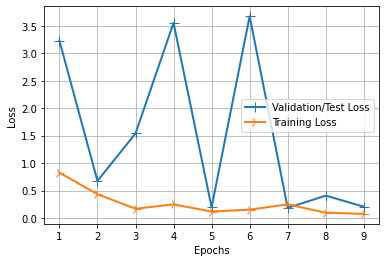

In [14]:


history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

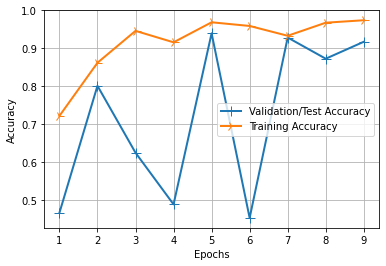

In [15]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
import numpy as np

In [17]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= xception_net.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

45/45 - 23s - 23s/epoch - 501ms/step


In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [20]:
cm_plot_labels = ['Myocardial_Infarction','Abnormal_Heartbeat','History_of_Myocardial_Infarction','Normal_person']

Confusion matrix, without normalization
[[104   0   8   0]
 [  0  87  25   0]
 [  0   0 112   0]
 [  0   0   4 108]]
Accuracy: 0.917
Precision: 0.843
Recall: 0.917
F-Measure: 0.917


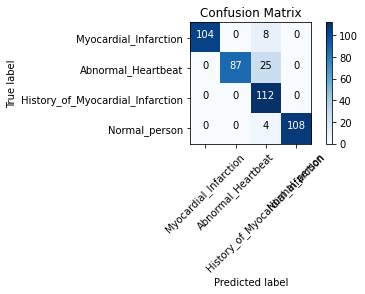

In [21]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)